In [2]:
# initialization
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import assemble, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
# init variables
n = 3 # number of qubits

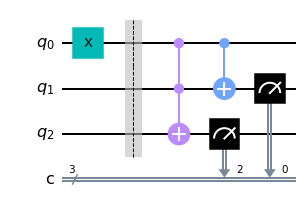

In [10]:
qreg_q = QuantumRegister(n, 'q')
creg_c = ClassicalRegister(n, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# q0 - a bit; q1 - b bit; q2 - c
def halfAdder(q0,q1,q2):
    circuit.barrier()
    # set q2 to be carry bit (using toffoli)
    circuit.toffoli(q0,q1,q2)
    # set q1 to be q0 XOR q1 (result)
    circuit.cnot(q0,q1)

# a = 1:
circuit.x(qreg_q[0])

# b = 1:
# circuit.x(qreg_q[1])

halfAdder(qreg_q[0],qreg_q[1],qreg_q[2])
circuit.measure(qreg_q[1], creg_c[0])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw('mpl')

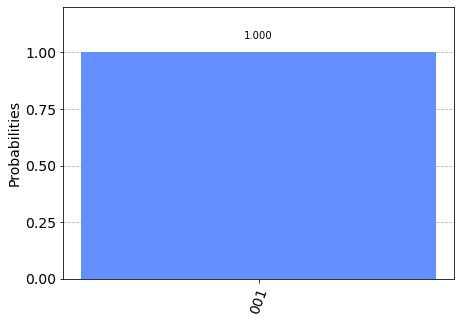

In [11]:
# use local simulator - can't run simlation because of inner gates
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n) and
                                                         not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

In [12]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(circuit, backend, optimization_level=0)
# job = backend.run(transpiled_circuit)
# job_monitor(job, interval=2)